In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
import sklearn.model_selection
import seaborn as sns
from sklearn.decomposition import PCA
import sklearn.cluster as sklc
%matplotlib inline

In [2]:
cl=pd.read_csv('ASD_3.csv')

In [3]:
cl

,Timestamp,Name,Age,Gender,Ethnicity,Country,A1,A2,A3,A4,...,A7,A8,A9,A10,Jaundice,PDIS,BISE,Anyone in the family has Autism?,Res,cluster
0,2/25/2019 16:51:28,ANI,22,1,INDIAN,INDIA,1,0,0,1,...,1,0,1,0,0,0,1,0,5,0
1,2/25/2019 16:54:51,ANI,22,1,INDIAN,INDIA,1,0,0,1,...,1,0,1,0,0,0,2,0,5,0
2,2/25/2019 16:55:40,ANI,22,1,INDIAN,INDIA,1,0,0,1,...,1,0,1,0,0,0,2,0,5,0
3,2/25/2019 18:34:44,anirudh,24,1,INDIAN,India,1,1,0,0,...,1,0,1,1,0,0,1,0,7,1
4,2/25/2019 18:36:02,arya,27,1,INDIAN,India,0,0,0,1,...,1,0,1,1,0,0,0,0,5,0
5,2/25/2019 19:29:12,Ani,23,1,INDIAN,INDIA,0,1,1,0,...,1,0,1,0,1,0,1,0,5,0
6,2/25/2019 19:35:51,God,22,1,all,everywhere,0,1,0,1,...,0,0,1,1,0,0,2,0,4,0
7,2/25/2019 19:38:12,Redacted,35,1,Redacted,Redacted,1,0,0,1,...,1,1,1,0,0,0,1,0,7,1
8,2/25/2019 19:51:25,Avisha Hadalamborghini,69,0,KKK,Lingaraj Puram,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
9,2/25/2019 19:53:07,Jayanth,50,1,Asian,Pakiatan,1,0,0,1,...,1,1,1,1,0,1,2,0,7,1


In [26]:

#Split the attributes into X and variable to be predicted into Y_orig
X =cl[['PDIS', 'Res','Jaundice','BISE']]
Y= cl['cluster']
names=list(Y.unique())

#Map categorical string values to numeral values
i = X.join(Y)

In [27]:
#Use principal component analysis to convert 4 attributes to 2 for plotting graph
pca = PCA(n_components=2).fit(i)
pca_2d = pca.transform(i)

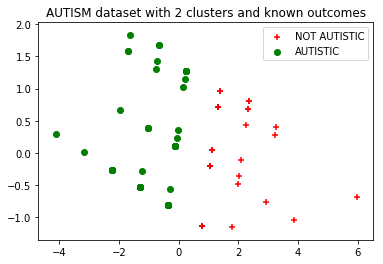

In [28]:
#Plot original data with given labels

import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if cl.cluster[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
    marker='+')
    elif cl.cluster[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
pl.legend([c1, c2], ['NOT AUTISTIC', 'AUTISTIC'])
pl.title('AUTISM dataset with 2 clusters and known outcomes')
pl.show()


In [29]:
#Implementing Kmeans, 2 clusters for 2 categories
#n_init - Number of time the k-means algorithm will be run with the class
#The final results will be the best output of n_init consecutive runs in terms of inertia. Default - 10
kmean= sklc.KMeans(n_clusters=2, n_init=20).fit(X)

#Y_pred holds the predicted values for X based on the clusters formed
Y_pred=kmean.predict(X)

In [30]:
Y_pred=pd.Series(Y_pred, name='cluster')


In [31]:
#Caclculate accuracy of the predictions 

sum=0
max_accuracy=0
comb=[0,1]
import itertools
perm = itertools.permutations([0,1], 2)
for p in perm:
    temp= Y_pred.replace({0:p[0], 1:p[1]})
    sum=0
    for x,y in zip(Y, temp):
        if x==y:
            sum=sum+1
    accuracy=sum/len(Y)*100
    if accuracy>max_accuracy:
        max_accuracy=max_accuracy+accuracy
        comb=p
print("Accuracy = %f" %max_accuracy)
Y_pred.replace({0:comb[0], 1:comb[1]}, inplace=True)

Accuracy = 92.783505


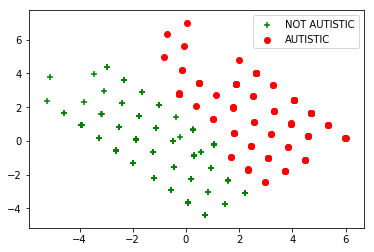

In [10]:
Pred= X.join(Y_pred)
for i in range(0, pca_2d.shape[0]):
    if Pred.Class_ASD[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='+')
    elif Pred.Class_ASD[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
 
pl.legend([c1, c2], ['NOT AUTISTIC', 'AUTISTIC'])

pl.show()